# Libaries needed

In [1]:
import pandas as pd
import tensorflow as tf
import seaborn as sns

# Loading and Exploring the Data

In [26]:
df = pd.read_csv('datasets/filter_mp.tsv',sep='\t')
df

,csid,mp,inchi,name,c,h,o,mol_wt,dou,Aromatic,OH,CO,CHO,COOH,COOR,ROR
0,7628,-92.9500,"InChI=1S/C5H8O2/c1-4(2)7-5(3)6/h1H2,2-3H3",isopropenyl acetate,5,8,2,100.11502,2.0,0,0,0,0,0,1,0
1,9478,-67.0500,"InChI=1S/C8H14O/c1-7(2)5-4-6-8(3)9/h5H,4,6H2,1...",6-methyl-5-hepten-2-one,8,14,1,126.19576,2.0,0,0,1,0,0,0,0
2,13864773,-65.0500,"InChI=1S/C5H10O3/c1-5(6)8-4-3-7-2/h3-4H2,1-2H3",2-methoxyethyl_acetate,5,10,3,118.12990,1.0,0,0,0,0,0,1,1
3,7515,-75.9500,"InChI=1S/C6H12O2/c1-3-5-8-6(7)4-2/h3-5H2,1-2H3",n-propyl propionate,6,12,2,116.15748,1.0,0,0,0,0,0,1,0
4,7782,-92.9500,"InChI=1S/C4H8O2/c1-2-3-6-4-5/h4H,2-3H2,1H3",n-propyl formate,4,8,2,88.10432,1.0,0,0,0,0,0,1,0
5,3218,186.0500,InChI=1S/C16H14O3/c17-15(10-11-16(18)19)14-8-6...,fenbufen,16,14,3,254.27936,10.0,1,0,1,0,1,0,0
6,6138,-111.9700,"InChI=1S/C3H6O/c1-3-2-4-3/h3H,2H2,1H3",propylene oxide,3,6,1,58.07874,1.0,0,0,0,0,0,0,1
7,7509,-66.0300,InChI=1S/C9H18O2/c1-3-5-6-7-8-9(10)11-4-2/h3-8...,ethyl heptanoate,9,18,2,158.23722,1.0,0,0,0,0,0,1,0
8,7728,-85.0400,"InChI=1S/C3H8O2/c1-5-3-2-4/h4H,2-3H2,1H3",2-methoxyethanol,3,8,2,76.09362,0.0,0,1,0,0,0,0,1
9,6296,-8.0300,"InChI=1S/C9H14O/c1-7-4-8(10)6-9(2,3)5-7/h4H,5-...",isophorone,9,14,1,138.20646,3.0,0,0,1,0,0,0,0


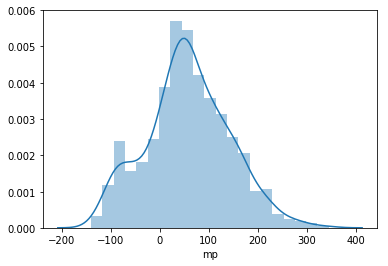

In [15]:
sns.distplot(df.mp)

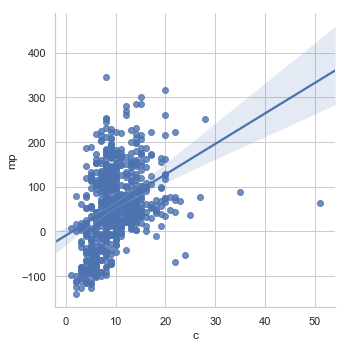

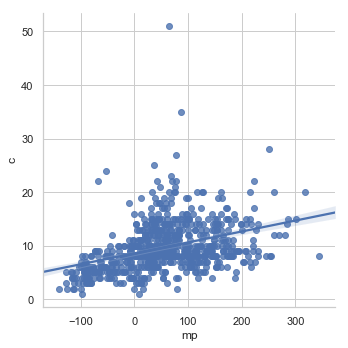

In [12]:
sns.set()
sns.set_style('whitegrid')
sns.lmplot(x='c',y='mp',data=df)
sns.lmplot(x='mp',y='c',data=df)

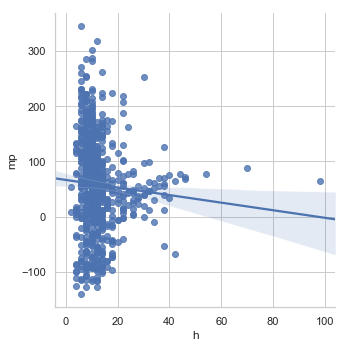

In [17]:
sns.lmplot(x='h',y='mp',data=df)

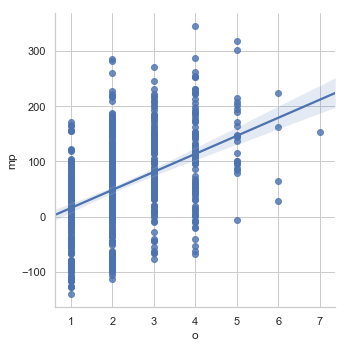

In [18]:
sns.lmplot(x='o',y='mp',data=df)

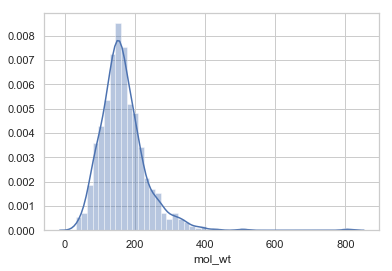

In [27]:
sns.distplot(df.mol_wt)

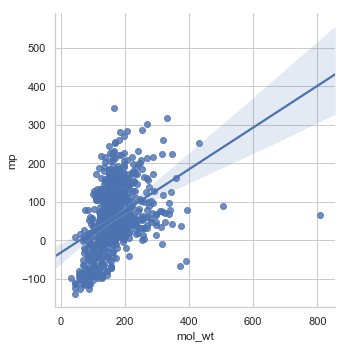

In [28]:
sns.lmplot(x='mol_wt',y='mp',data=df)

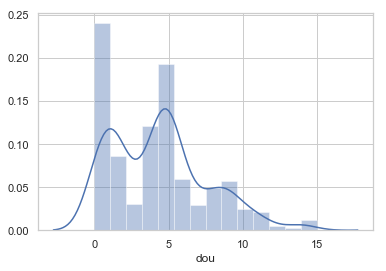

In [10]:
sns.distplot(df.dou)

In [31]:
df.loc[df['OH']==1]

,csid,mp,inchi,name,c,h,o,mol_wt,dou,Aromatic,OH,CO,CHO,COOH,COOR,ROR
8,7728,-85.040000,"InChI=1S/C3H8O2/c1-5-3-2-4/h4H,2-3H2,1H3",2-methoxyethanol,3,8,2,76.09362,0.0,0,1,0,0,0,0,1
13,13860335,-15.050000,"InChI=1S/C7H8O/c8-6-7-4-2-1-3-5-7/h1-5,8H,6H2",benzyl alcohol,7,8,1,108.13742,4.0,1,1,0,0,0,0,0
14,6657,-6.900000,"InChI=1S/C10H14O/c1-10(2,3)8-6-4-5-7-9(8)11/h4...",2-tert-butylphenol,10,14,1,150.21716,4.0,1,1,0,0,0,0,0
17,12450,-2.130000,"InChI=1S/C4H6O/c1-2-3-4-5/h5H,4H2,1H3",2-butyn-1-ol,4,6,1,70.08944,2.0,0,1,0,0,0,0,0
24,29000,-117.070000,"InChI=1S/C5H12O/c1-5(2)3-4-6/h5-6H,3-4H2,1-2H3",3-methyl-1-butanol,5,12,1,88.14778,0.0,0,1,0,0,0,0,0
31,224468,124.100000,InChI=1S/C17H14O3/c1-2-14-16(13-5-3-4-6-15(13)...,benzarone,17,14,3,266.29006,11.0,1,1,1,0,0,0,0
41,11741,-50.200000,"InChI=1S/C8H18O/c1-4-5-6-7-8(2,3)9/h9H,4-7H2,1...",2-methyl-2-heptanol,8,18,1,130.22752,0.0,0,1,0,0,0,0,0
42,6248,-23.800000,"InChI=1S/C6H14O/c1-4-6(3,7)5-2/h7H,4-5H2,1-3H3",3-methyl-3-pentanol,6,14,1,102.17436,0.0,0,1,0,0,0,0,0
46,733,18.000000,"InChI=1S/C3H8O3/c4-1-3(6)2-5/h3-6H,1-2H2",glycerol,3,8,3,92.09262,0.0,0,1,0,0,0,0,0
49,21106133,2.870000,"InChI=1S/C5H8O/c1-4-5(2,3)6/h1,6H,2-3H3",2-methyl-3-butyn-2-ol,5,8,1,84.11602,2.0,0,1,0,0,0,0,0


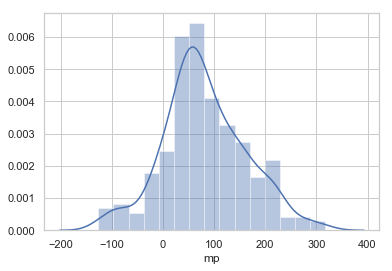

In [36]:
df_oh = df.loc[df['OH']==1]
df_oh
sns.distplot(df_oh.mp)

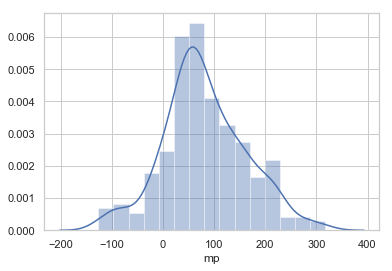

In [37]:
sns.distplot(df.loc[df['OH']==1].mp)

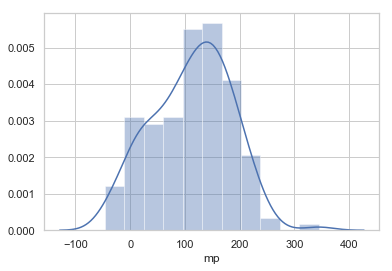

In [38]:
sns.distplot(df.loc[df['COOH']==1].mp)

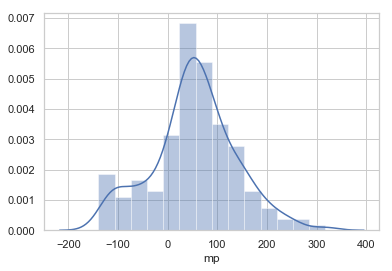

In [39]:
sns.distplot(df.loc[df['ROR']==1].mp)

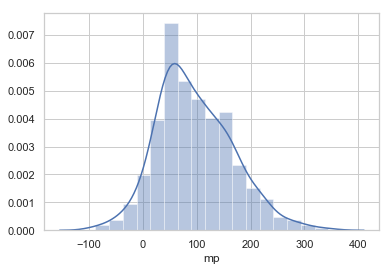

In [40]:
sns.distplot(df.loc[df['Aromatic']==1].mp)

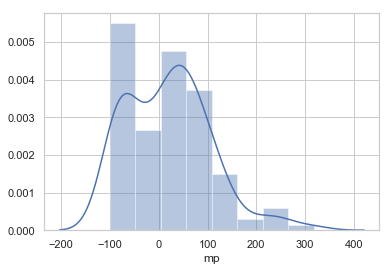

In [41]:
sns.distplot(df.loc[df['COOR']==1].mp)

# Building a Model